# Exploratory and visual analysis of the FordGo bike rental system for the year 2019

## Author/Analyst: Leon Hamnett

### [LinkedIn](https://www.linkedin.com/in/leon-hamnett/)

## Contents:

1. [Introduction](#introduction)
2. [Preliminary Wrangling](#wrangle)
3. [Univariate Analysis](#univ)
    1. [Duration](#univ-dur)
    2. [User Type](#univ-user)
    3. [Time Periods](#univ-time)
    4. [Stations](#univ-stat) 
4. [Bivariate Analysis](#biv)
    1. [User Type](#biv-user)
    2. [User Type vs Time Periods](#biv-user-time)
    3. [Popular stations](#biv-pop)
    4. [Duration vs Time Period](#biv-dur-time)
5. [Multivariate Analysis](#mulvar)
    1. [Time Period Vs Duration Vs User Type](#mul-tim-dur-user)
6. [Conclusions](#conc)


## Introduction <a name="introduction"></a>

This data set includes information about individual rides made in a bike-sharing/bike rental system covering the greater San Francisco Bay area for the year 2019. We can see start and end times and dates for each ride, as well as the start and end station as well as the type of user (Pay-as-you-use 'Customer' or pay-monthly 'Subscriber) who is using this service. 

This analysis will try to discover trends in this data via univariate,bivariate and multivariate visualisations and then use these trends to provide actionable insights for the company for improvments to their business model.


## Preliminary Wrangling <a name="wrangle"></a>



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Gathering Data:

First we will need to gather the data. We have obtained  CSV files containing the data for the bicycle service for the 12 months in 2019. As we have a CSV file for each month, we will read all the file into separate dataframes and then we will combine them all together.

In [3]:
%%script false --no-raise-error
#list of files
files = ['201901-fordgobike-tripdata.csv',
'201902-fordgobike-tripdata.csv',  
'201903-fordgobike-tripdata.csv',  
'201904-fordgobike-tripdata.csv',      
'201905-baywheels-tripdata.csv',
'201906-baywheels-tripdata.csv',    
'201907-baywheels-tripdata.csv',   
'201908-baywheels-tripdata.csv',   
'201909-baywheels-tripdata.csv',              
'201910-baywheels-tripdata.csv',  
'201911-baywheels-tripdata.csv',
'201912-baywheels-tripdata.csv']

#create separate dataframes
bike_2019_01 = pd.read_csv(files[0])
bike_2019_02 = pd.read_csv(files[1])
bike_2019_03 = pd.read_csv(files[2])
bike_2019_04 = pd.read_csv(files[3])
bike_2019_05 = pd.read_csv(files[4])
bike_2019_06 = pd.read_csv(files[5])
bike_2019_07 = pd.read_csv(files[6])
bike_2019_08 = pd.read_csv(files[7])
bike_2019_09 = pd.read_csv(files[8])
bike_2019_10 = pd.read_csv(files[9])
bike_2019_11 = pd.read_csv(files[10])
bike_2019_12 = pd.read_csv(files[11])


In [4]:
%%script false --no-raise-error
#create list of dataframes to merge
dataframes = [bike_2019_01, 
bike_2019_02, 
bike_2019_03, 
bike_2019_04, 
bike_2019_05, 
bike_2019_06, 
bike_2019_07,
bike_2019_08, 
bike_2019_09, 
bike_2019_10, 
bike_2019_11, 
bike_2019_12]

#concat all data into one dataframe.
for d in range(0,len(dataframes)-1):
    if d == 0:
        bike_all = pd.concat([dataframes[d],dataframes[d+1]],axis=0)
    else:
        bike_all = pd.concat([bike_all,dataframes[d+1]],axis=0)



In [5]:
%%script false --no-raise-error
#check to see dataframe have combined successfully
bike_all.head()
bike_all.tail
bike_all.shape

As the dataset contains multiple cities, we will focus our investigation into the biggest city in the dataset: San Francisco. To do this we check the [map](https://www.lyft.com/bikes/bay-wheels/system-data) of the ridesharing stations to see where the furthest stations are to the north,south,east and west are for the San Francisco City area.

We then find appropiate longitude and lattitude points for each boundary and select rows that are within this area.

In [6]:
%%script false --no-raise-error 
#long and lat limits for San Francisco City Area

#limit south: 37.677976, -122.472212
#limit north 37.813443, -122.414877
#limit west 37.755649, -122.529890
#limit east 37.763385, -122.346599

#locate rows which are inside this area given by the furthest station for North,East,South and West stations
bike_select = bike_all.loc[(bike_all['start_station_latitude']>37.678)&(bike_all['start_station_latitude']<37.813)]
bike_select2 = bike_select.loc[(bike_select['start_station_longitude']<-122.347)&(bike_select['start_station_longitude']>-122.530)]
bike_select3 = bike_select2.loc[(bike_select2['end_station_latitude']>37.678)&(bike_select2['end_station_latitude']<37.813)]
bike_select4 = bike_select3.loc[(bike_select3['end_station_longitude']<-122.347)&(bike_select3['end_station_longitude']>-122.530)]

#create the dataframe for use during the investigation
bike_san_fran = bike_select4.copy()

Now we change variables to suitable datatypes as needed and we perform some feature engineering to add columns to enable more indepth analysis. 

In [7]:
%%script false --no-raise-error
#switch start and end times to datetime
bike_san_fran['start_time'] = pd.to_datetime(bike_san_fran['start_time'], format="%Y-%m-%d %H:%M")
bike_san_fran['end_time'] = pd.to_datetime(bike_san_fran['end_time'], format="%Y-%m-%d %H:%M")

#add new columns for date variables
bike_san_fran['start_month'] = bike_san_fran['start_time'].map(lambda x: x.month)
bike_san_fran['start_day_no'] = bike_san_fran['start_time'].map(lambda x: x.day)
bike_san_fran['start_day_name'] = bike_san_fran['start_time'].map(lambda x: x.day_name())
bike_san_fran['start_hour'] = bike_san_fran['start_time'].map(lambda x: x.hour)

#obtain column for duration in minutes for easier interpretation
bike_san_fran['duration_min'] = bike_san_fran['duration_sec']/60

In [8]:
%%script false --no-raise-error
#save to csv for easier loading in the future
bike_san_fran.to_csv('bike_san_fran.csv')

In [9]:
#load clean dataset from CSV
bike_san_fran = pd.read_csv('bike_san_fran.csv')

/home/leon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### What is the structure of the dataset?

After combining all the datasets we obtain a dataset for the entire year of 2019. We then selected rows which started and ended within San Francisco city area. We then obtain a dataset which has 1852745 rows and 15 columns

### What are the main feature(s) of interest in the dataset?

1) We want to look at the usage patterns of bikes on a variety of timescales including by year,by month,by day of month,by weekday and by hour. 

2) We want to look at the journey duration to see how long users are riding a bike for.

3) We want to see if the usage patterns are affected by whether a user subscribes to the bike sharing service or simply is a "pay-as-you-use" customer.

4) We would also like to check the most popular start and end points and to check the number of journeys made between popular bike stations.

### What features in the dataset will help support your investigation into the feature(s) of interest?

We are interested in the the columns: start_month,start_day_no,start_day_name,start_hour and to see how they relate to journey duration variables. 

We are also interested in the type of user to see if subscribers take more journeys or longer journeys than customers.

Also we would like to locate the most (and least) popular bike stations and identify the most popular journey routes.


## Univariate Exploration  <a name="univ"></a>

In this section, we will investigate one at a time the distributions of the various variables of interest to get a feel for the data. We will also see if we can spot any interesting patterns to investigate further in more detail with bivariate or multivariate visualisations. 

#### Duration:  <a name="univ-dur"></a>

Firstly we will check the distribution for duration by creating a histogram:

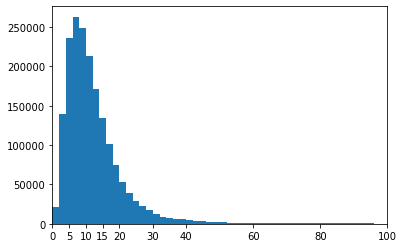

In [10]:
# histogram for duration in minutes
bin_size = 2
bins = np.arange(0,bike_san_fran.duration_min.max()+bin_size,bin_size)
plt.hist(bike_san_fran.duration_min,bins=bins)
plt.xlim(0,100)
plt.xticks([0,5,10,15,20,30,40,60,80,100]);

We can see from the above histogram, that the duration (measured in minutes) has a modal peak around 10 minutes, and is skewed to the right. We see  most users only use the bike service for small journeys less than 20 minutes. We see there is a significant tail representing a small number of users who ride for a length of time between 40 and 100 minutes. 

#### User type:  <a name="univ-user"></a>

Now we will check the number of times a bike is used by a customer vs the times it was used by a subscriber.

<BarContainer object of 2 artists>

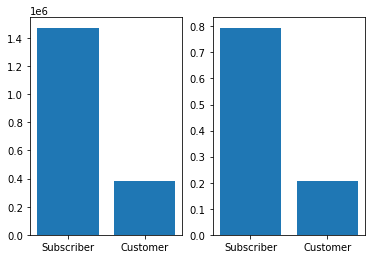

In [11]:
#obtain counts for each user type
users = bike_san_fran.groupby(by='user_type').size().sort_index(ascending=False)
#set up subplots
f, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)

ax1.bar(x=users.index,height=users)
total = bike_san_fran.shape[0]
ax2.bar(x=users.index,height=[(users[0]/total),(users[1]/total)],data=bike_san_fran)

From the first bar chart we can see that there is around a million more subscribers than customers who use this service. In order to take into account relative proportions, we create the second bar chart showing proportions of total users. We see around 80% of users are subscribers and 20% are customers.

#### Usage distributions over time periods:  <a name="univ-time"></a>


Now we want to check the distributions for the time variables to see if we can identify any patterns in peak usage. We will create a bar chart for the following time periods showing the values for the time period along the x-axis and the count for each value on the y axis.

The time periods of interest are:

1) Per Month over a Year

2) Per Day over a Month

3) Per Weekday over a Week

4) Per Hour over a Day

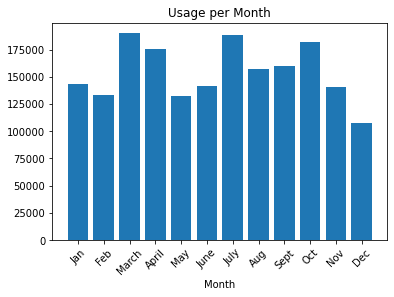

In [12]:
# Bar chart showing counts Per Month over a Year
month_labels =  ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July','Aug', 'Sept', 'Oct', 'Nov', 'Dec']
times = bike_san_fran.groupby(by='start_month').size()
plt.bar(x=times.index,height=times)
plt.title('Usage per Month')
plt.xlabel('Month')
plt.xticks(times.index,month_labels,rotation=45)
plt.show()
usage_month = plt

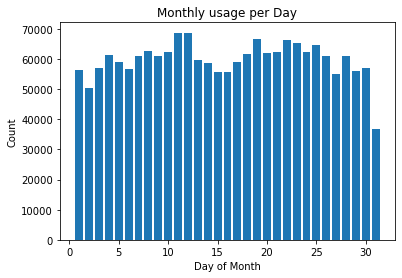

In [13]:
#Bar chart showing counts Per Day over a Month
times = bike_san_fran.groupby(by='start_day_no').size()
plt.bar(x=times.index,height=times)
plt.title('Monthly usage per Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.show()

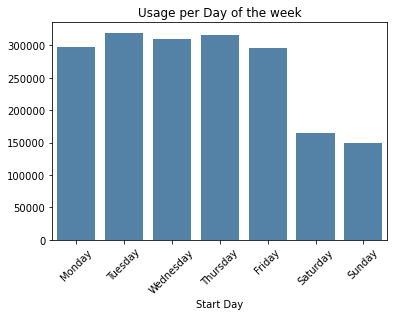

In [14]:
#Bar chart showing counts Per Weekday over a Week
times = bike_san_fran.groupby(by='start_day_name').size()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(x=times.index,y=times,order=order,color='steelblue')
plt.xticks(rotation=45)
plt.title('Usage per Day of the week')
plt.xlabel('Start Day')
plt.show()

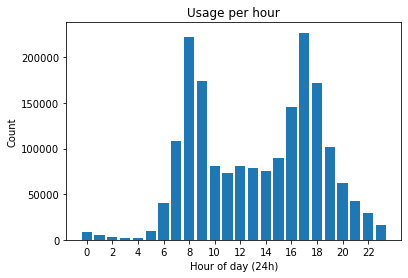

In [15]:
#Bar chart showing counts Per Hour over a Day
times = bike_san_fran.groupby(by='start_hour').size()
plt.bar(x=times.index,height=times)
plt.title('Usage per hour')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.xlabel('Hour of day (24h)')
plt.ylabel('Count')
plt.show()

We can see some interesting usage patterns from the above four graphs. We can see that there is an increase in usage around March and April, a decrease in usage and then an increase in July. Another drop then an increase again in October and a drastic decrease in December. 

We see the usage of the bikes is fairly consistent across an entire month, with slight dips around the 6th, 15th /16th and on the 27th too. 

We can see that there is a significant drop in bike usage on Saturday and Sunday, possibly as people do not have to commute to work. 

We see that peak hours to use the service are around 8 in the morning and 5 in the afternoon. Probably relating to rush hours of people going to and coming home from work. 

### Stations:  <a name="univ-stat"></a>
#### Most popular stations:

Next we'll try to gain an insight into the most and least popular bike stations that users depart and arrive at. We will group the data by start sation name and end station name and then for each grouping check the top 15 stations by count and the bottom 15 stations by count.



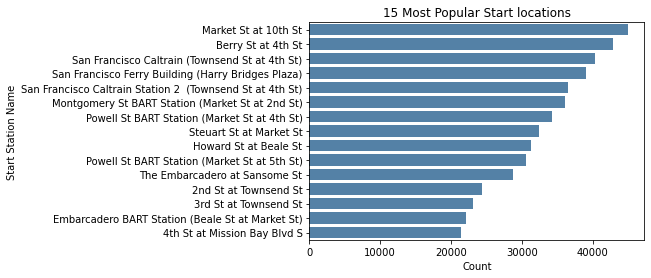

In [16]:
#horizontal bar chart for counts of most popular start stations
start_stations_high = bike_san_fran.groupby(by='start_station_name').size().sort_values(ascending=False)[:15]
sb.barplot(x=start_stations_high,y=start_stations_high.index,color='steelblue')
plt.title('15 Most Popular Start locations')
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.show()

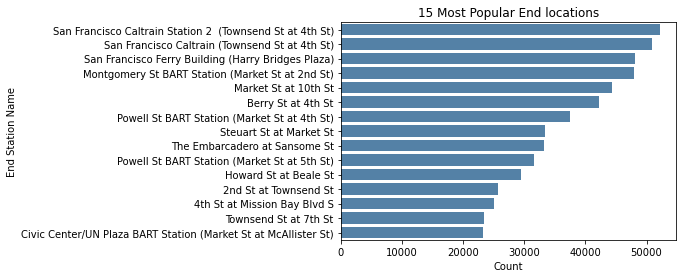

In [17]:
#horizontal bar chart for counts of most popular end stations
end_stations_high = bike_san_fran.groupby(by='end_station_name').size().sort_values(ascending=False)[:15]
sb.barplot(x=end_stations_high,y=end_stations_high.index,color='steelblue')
plt.title('15 Most Popular End locations')
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.show()

We can see from the above two graphs that the most popular start and end points have between 40,000 and 50,000 journeys present in the dataset. This information could be used by the company to ensure that there is always sufficient bikes for users at the most popular start points to ensure demand is met during peak hours. 

Also assuming the company has some method of redistributing bikes, it would be prudent for them to check the most popular end locations as often as possible to ensure there is not a build up of bikes at these locations and to prevent a frustrated user experience of not being able to dock their bike due to a lack of available docks as they are all already filled with bikes.

#### Least popular:

Now we will also examine the least popular start and end locations, again using horizontal bar charts.

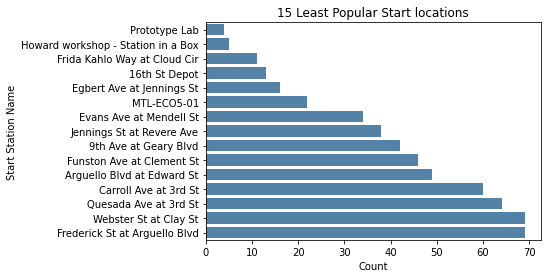

In [18]:
#horizontal bar chart for counts of least popular start stations
start_stations_low = bike_san_fran.groupby(by='start_station_name').size().sort_values(ascending=True)[:15]
sb.barplot(x=start_stations_low,y=start_stations_low.index,color='steelblue')
plt.title('15 Least Popular Start locations')
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.show()

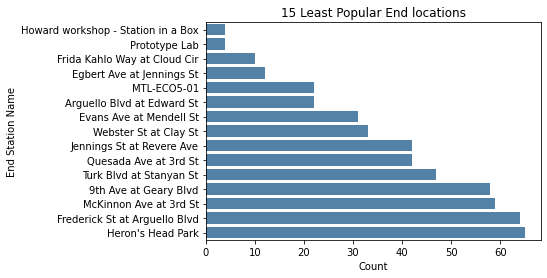

In [19]:
#horizontal bar chart for counts of least popular start stations
end_stations_low = bike_san_fran.groupby(by='end_station_name').size().sort_values(ascending=True)[:15]
sb.barplot(x=end_stations_low,y=end_stations_low.index,color='steelblue')
plt.title('15 Least Popular End locations')
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.show()

From the bar charts given above, we can see the least popular start and end points. We can see that the workshop and testing facility (prototype lab) are amongst the least used start and end locations, probably as once bikes are fixed or initiated from these locations, they are put out into general circulation and do not return here unless there is an issue. 

We see for the other stations there are around 70 users visiting these locations out of nearly two millions journeys taken. This could indicate that these stations are surplus to requirements and possibly the company could save money by getting rid of these stations. 

This could also indicate some other issue not shown in the data, for example the stations at these locations do not work properly and so users tend to avoid these locations to prevent uneccessary trouble when trying to obtain a bike. It could also be that these stations are in 'undesirable' areas and so perhaps users do not feel safe starting or ending a joruney at these places. More research could be undertaken to look into this issue. 

## Bivariate Exploration  <a name="biv"></a>

In this section we will begin to look at pairwise comparisons of variables of interest, in particular user type, journey duration,time period and popular journey routes.

#### User type:  <a name="biv-user"></a>

In this section we will look further into the usage patterns and compare the usage patterns between Customer users and Subscriber users. First we will create some bar charts and violin plots to get a feel for the average duration time and the distribution of journey duration times for each user type.

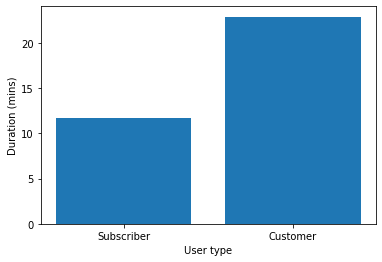

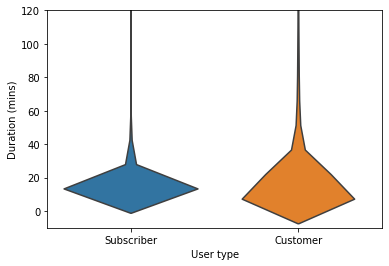

In [20]:
#time vs user type
user_type_order=['Subscriber','Customer']
bar = bike_san_fran.groupby(by='user_type').duration_min.mean().sort_index(ascending=False)
plt.bar(x=bar.index,height=bar)
plt.xlabel('User type')
plt.ylabel('Duration (mins)')
plt.show()
sb.violinplot(x='user_type',y='duration_min',data=bike_san_fran,order=user_type_order,inner=None)
plt.ylim(-10,120)
plt.xlabel('User type')
plt.ylabel('Duration (mins)')
plt.show()

As we can see from the above plots, **customers on average use a single bike for approximately twice as long as a subscriber**. We can see from the violin plots that **subscribers have a higher distribution in the lower duration values** but **customers have much more higher duration journeys** and so this pulls the customer average upwards. 

We can also check to see if the outliers are distorting our results:

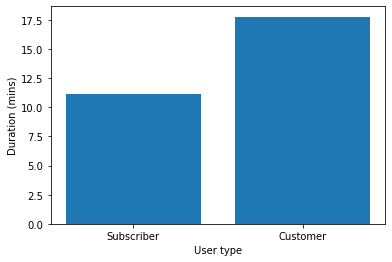

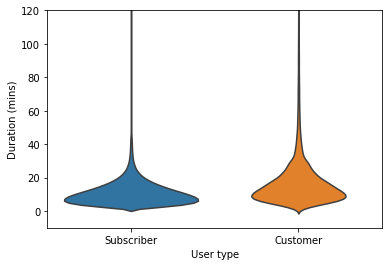

In [21]:
low_duration = bike_san_fran.loc[bike_san_fran['duration_min']<=120]
bar = low_duration.groupby(by='user_type').duration_min.mean().sort_index(ascending=False)
plt.bar(x=bar.index,height=bar)
plt.xlabel('User type')
plt.ylabel('Duration (mins)')
plt.show()
sb.violinplot(x='user_type',y='duration_min',data=low_duration,order=user_type_order,inner=None)
plt.ylim(-10,120)
plt.xlabel('User type')
plt.ylabel('Duration (mins)')
plt.show()


We can see that the outliers are pulling the values for the customer user type and so depending on the level of accuracy required for the journey duration, it could be prudent to subset the data and limit it by only showing duration times under 1 hour for example. 

### User type vs time periods  <a name="biv-user-time"></a>

Now we wish to check if there is a difference in patterns of usage between customers and subscribers for different timeframes. We will generate a series of cluster bar charts to observe the difference in usage statistics.

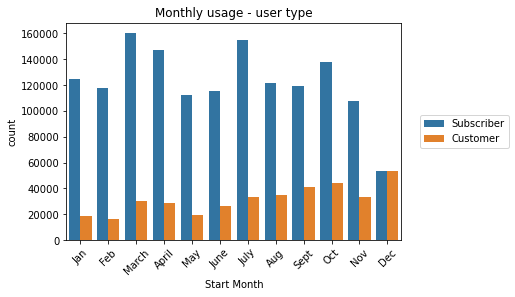

In [22]:
#examine the counts for the two user types over different time periods

#Bar chart showing counts for each user type for time period: Per Month over a Year
sb.countplot(data = bike_san_fran, x = 'start_month', hue = 'user_type')
#polish
plt.title('Monthly usage - user type')
#get xtick locations
month_locs = np.arange(0,12)
plt.xticks(month_locs,month_labels,rotation=45)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlabel('Start Month')
plt.show()

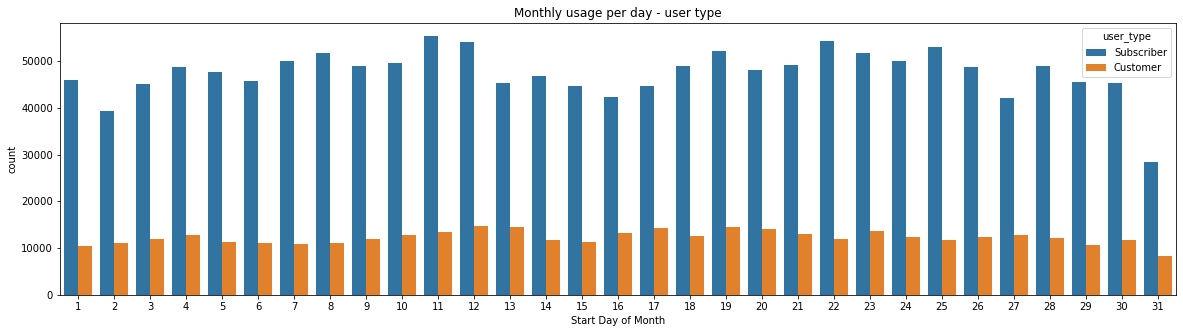

In [23]:
#Bar chart showing counts for each user type for time period: Per Day over a Month
plt.figure(figsize=(20,5))
sb.countplot(data = bike_san_fran, x = 'start_day_no', hue = 'user_type')
plt.title('Monthly usage per day - user type')
plt.xlabel('Start Day of Month')
plt.show()

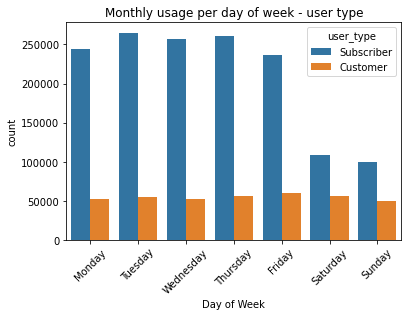

In [24]:
#Bar chart showing counts for each user type for time period: Per Weekday over a Week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = bike_san_fran, x = 'start_day_name', hue = 'user_type',order=order)
plt.title('Monthly usage per day of week - user type')
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.show()

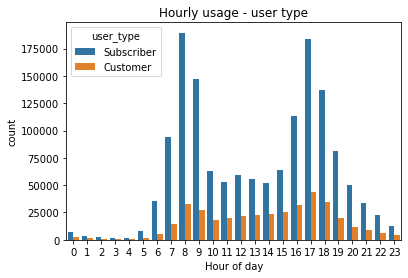

In [25]:
#Bar chart showing counts for each user type for time period: Per Hour over a Day
sb.countplot(data = bike_san_fran, x = 'start_hour', hue = 'user_type')
plt.title('Hourly usage - user type')
plt.xlabel('Hour of day')
plt.show()

From the graphs above we can see the distribution of users of the bike service for each time period, split into subscribers and customers.

We can see the **number of subscribers is always much higher than the number of customers**, the only exception is in December when the number of subscribers drops drastically and the number of customers reaches its peak. This could be because normal subscribers feel they will not use the service as much in December and so feel that it is better value for money to cancel their subscription and use the service as a customer instead.

We can also see that the **number of customer users stays pretty much constant across the week, whereas the number of subscribers using the service on Saturday and Sunday, drops drastically**. This could indicate that the main demographic of subscribers are people who use the service to commute from monday to friday and do not tend to use the service as much on days when they do not have to go into work. 

We see the **hourly usage** follows the same trends as discovered during the univariate exploration, with **peaks around 8 in the morning and 5 in the afternoon.**



#### Popular Journeys  <a name="biv-pop"></a>

Now we will analyse the popular journeys that people are taking by looking at the distribution of journeys from the top 10 most popular start station to the top 10 most popular end stations. We will make a heatmap of the 10 most popular start locations and end locations and try to visualise which combinations of journeys are most popular.

/home/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


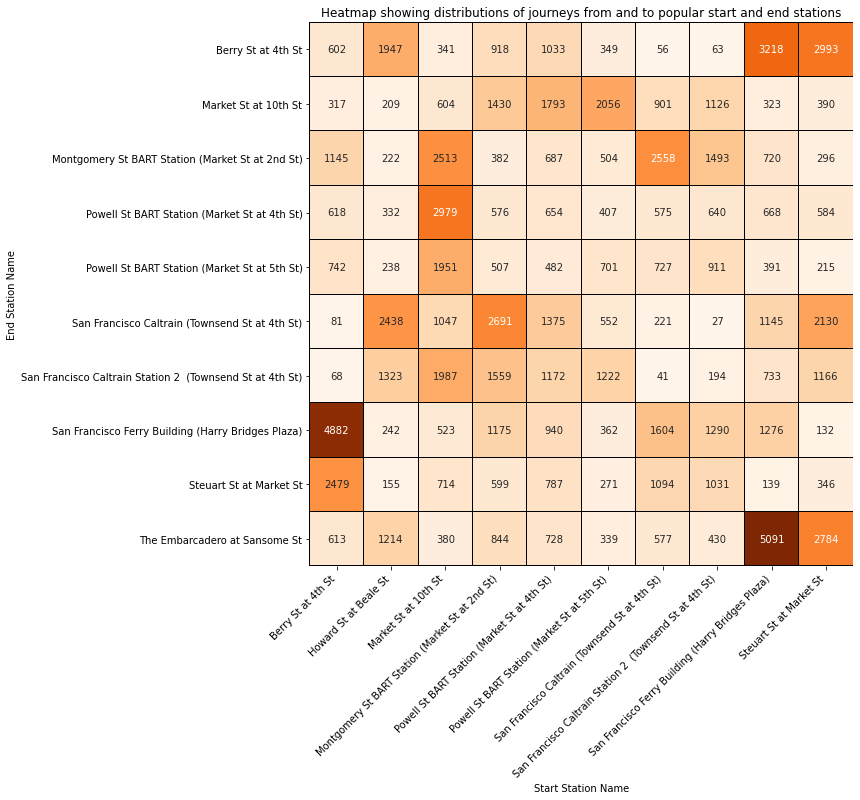

In [26]:
#select top 10 most popular start and end locations
heatmap_start_stations = start_stations_high.index[:10]
heatmap_end_stations = end_stations_high.index[:10]

#create new dataframe for rows matching popular start or end locations
heatmap_data = bike_san_fran.loc[(bike_san_fran['start_station_name'].isin(heatmap_start_stations))&(bike_san_fran['end_station_name'].isin(heatmap_end_stations))]
heatmap_data2 = heatmap_data[['start_station_name','end_station_name']]
heatmap_data2.dropna(axis=0,how='any',inplace=True)

#get counts for heatmap
ct_counts = heatmap_data2.groupby(['start_station_name', 'end_station_name']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'end_station_name', columns = 'start_station_name', values = 'count')

#plot heatmap
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111) 
heatmap = sb.heatmap(ct_counts,robust=False,linewidths=0.01,linecolor='black',square=True,annot=True,cmap='Oranges',fmt='',cbar=False,xticklabels=True)
#polish
plt.title('Heatmap showing distributions of journeys from and to popular start and end stations')
plt.xlabel('Start Station Name')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.ylabel('End Station Name');


As we can see from the above heatmap, the **three most popular journeys from and to top 10 station** are as follows:

1) Start : San Francisco Ferry Building (Harry Bridges Plaza) Finish: The Embarcadero at Sansome St

2) Start : Berry St at 4th St Finish: San Francisco Ferry Building (Harry Bridges Plaza)

3) Start : San Francisco Ferry Building (Harry Bridges Plaza) Finish: Berry St at 4th St 

By coincidence we see that the second and third most popular routes within this dataset, share starting and finishing points. This could indicate a large number of people travel between these two points within the city as they could be in central locations for certain districts. 

We would advise that the company ensures there are **sufficient bikes at each of the start points** to keep up with demand, whilst also ensuring there is **not an excess of bikes not being used at the finish points** as this could prevent users from parking their bike if all the slots are full. This also hints that the bike redistribution service could take an **efficient route by including the three finish stations.**

In the future, a further visualisation could be created to show a heatmap with a greater number of popular start and finish stations to identify further high traffic journey routes.

#### Duration against time period:  <a name="biv-dur-time"></a>

We would also like to check whether the time of day,week,month and year effects how long a user hires a bike for. To gain an insight into the effect time periods have on duration of journey, we will plot box plots to see the summary statistics for each particular time period. This enables us to spot patterns at a glance.

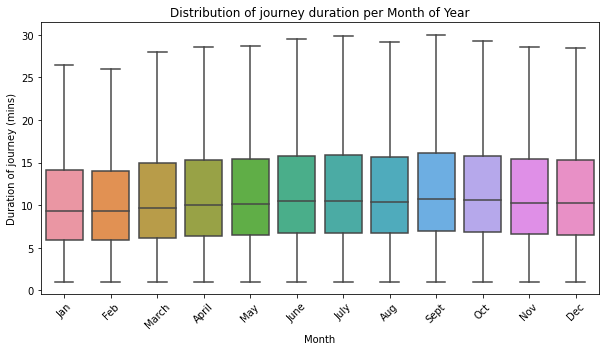

In [27]:
#box plots showing distribution of journey duration in minutes for different time periods

#Box plots showing duration in minutes for time period: Per Month over a Year
plt.figure(figsize=(10,5))
sb.boxplot(x='start_month',y='duration_min',data=bike_san_fran,showfliers=False)
plt.title('Distribution of journey duration per Month of Year')
plt.xlabel('Month')
plt.ylabel('Duration of journey (mins)')
plt.xticks(month_locs,month_labels,rotation=45)
plt.show()

We can see that the average duration of bike joruney rises in the summer months by 2 or 3 minutes and then dips down again during the autumn and winter months.

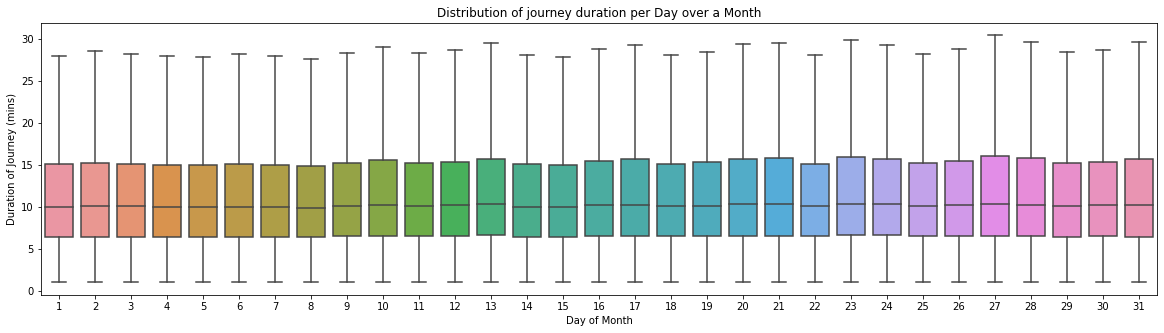

In [28]:
#Box plots showing duration in minutes for time period: Per Day over a Month
plt.figure(figsize=(20,5));
sb.boxplot(x='start_day_no',y='duration_min',data=bike_san_fran,showfliers=False)
plt.title('Distribution of journey duration per Day over a Month')
plt.xlabel('Day of Month')
plt.ylabel('Duration of Journey (mins)')
plt.show()

We can see from these box plots above that there is not much variation in the average duration of a journey depending on the day of the month. 

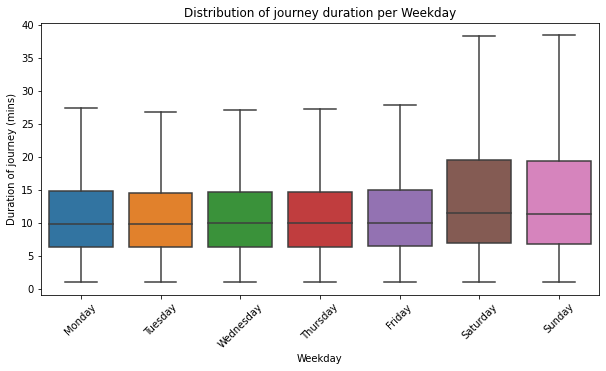

In [29]:
#Box plots showing duration in minutes time period: Per Weekday over a Week
plt.figure(figsize=(10,5));
sb.boxplot(x='start_day_name',y='duration_min',data=bike_san_fran,order=order,showfliers=False)
plt.title('Distribution of journey duration per Weekday')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.ylabel('Duration of journey (mins)')
plt.show()

We can see that the **average journey duration** stays fairly **constant during the weekdays** and then shows an average **increase on weekend days**. We also see that the inter-quartile range and the range both increase on Saturday and **Sunday showing a greater variability in journey times** as well as a larger number of users taking longer bike journeys.

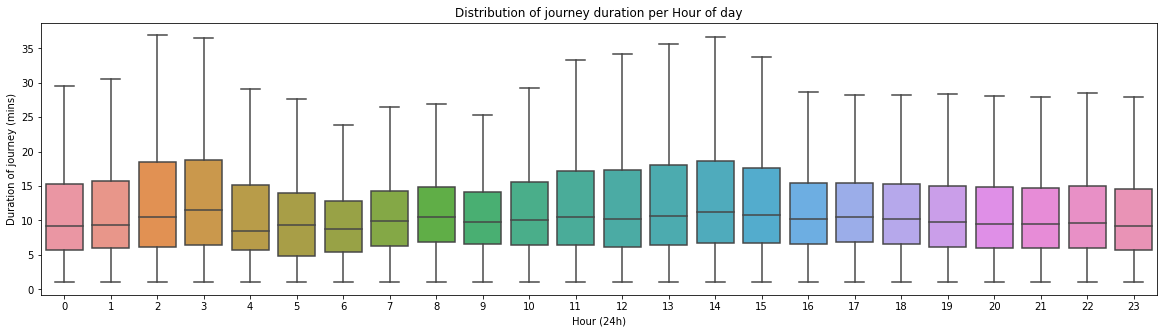

In [30]:
#Box plots showing duration in minutes time period: Per Hour over a Day
plt.figure(figsize=(20,5));
sb.boxplot(x='start_hour',y='duration_min',data=bike_san_fran,showfliers=False)
plt.title('Distribution of journey duration per Hour of day')
plt.xlabel('Hour (24h)')
plt.ylabel('Duration of journey (mins)')
plt.show()

We see from the box plots above that we see **minimum average journey times around 6 in the morning and then seeing a rise until about 2 in the afternoon and then a gradual decrease towards 11 at night.**

We do see an **unexpected rise in average duration** and 4th quartile durations during the **early hours of the morning around 2 and 3 AM**.  This could be explained by late shift workers finishing their shifts or people returning home from bars, but we will keep an eye out for similar patterns in later stages of the analysis. 

## Multivariate Exploration  <a name="mulva"></a>

For this section, we will now add in additional variables to our analysis and compare three or more variables with the visualisations.

#### Time period vs Journey duration (split by user type)  <a name="mul-tim-dur-user"></a>

Firstly we will look at the relationship between usage patterns for each time period and the average duration of journey by each type of user Subscriber and Customer. To do this we will create clustered bar charts for each time period, allowing us to clearly see the difference in usage patterns for each type of user over the time period of interest.

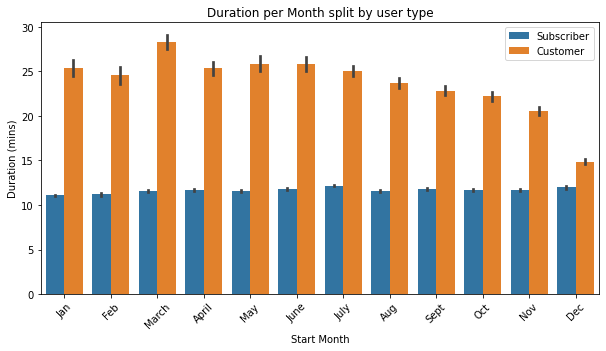

In [31]:
#clustered bar charts time period, duration in minutes and user type

#Clustered Bar chart showing duration in minutes for each user type for time period: Per Month over a Year
plt.figure(figsize=(10,5))
sb.barplot(data = bike_san_fran, x = 'start_month', y = 'duration_min', hue = 'user_type')
#polish
plt.xticks(month_locs,month_labels,rotation=45)
plt.xlabel('Start Month')
plt.ylabel('Duration (mins)')
plt.title('Duration per Month split by user type')
plt.legend(loc="upper right")
plt.show()

For the above clustered bar chart, we can see that user duration for Subscribers, stays pretty much constant across all the months for the entire year. Except for December we see that in all months Customers ride a bike on average for twice as long as Subscribers.

It is interesting to note that the numbers of Customer users dips in December, maybe because it is too cold to ride a bike during this month or that people are spending more time with their families and so are less likely to go on bike rides. 

Either way it seems like **Customers are less likely to pay for the bike service during the month of December**.

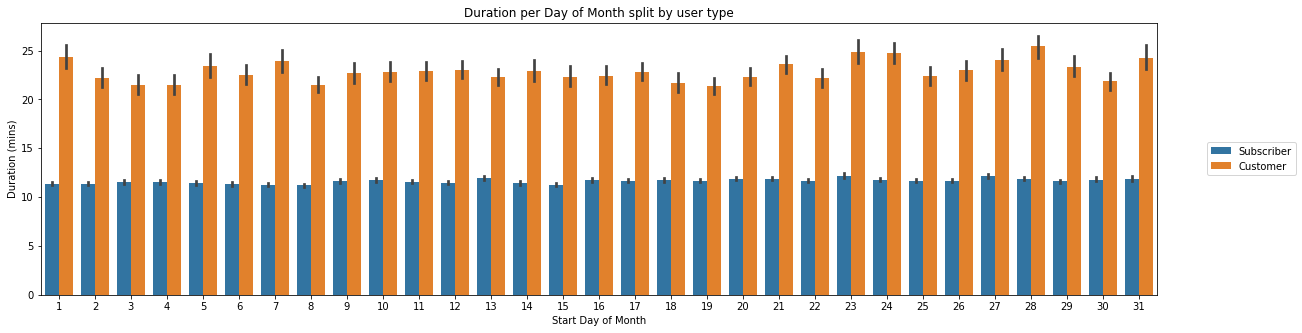

In [32]:
#Clustered Bar chart showing duration in minutes for each user type for for time period: Per Day over a Month
plt.figure(figsize=(20,5))
sb.barplot(data = bike_san_fran, x = 'start_day_no', y = 'duration_min', hue = 'user_type')
#polish graph
plt.xlabel('Start Day of Month')
plt.ylabel('Duration (mins)')
plt.title('Duration per Day of Month split by user type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

We can see from the clustered bar chart above, there is not much variation in the ride duration of either Subscribers or Customers depending on the day of the month. As noted before it seems on average Customers ride for almost twice as long as Subscribers as can clearly be shown by the higher orange bars in the above graph.

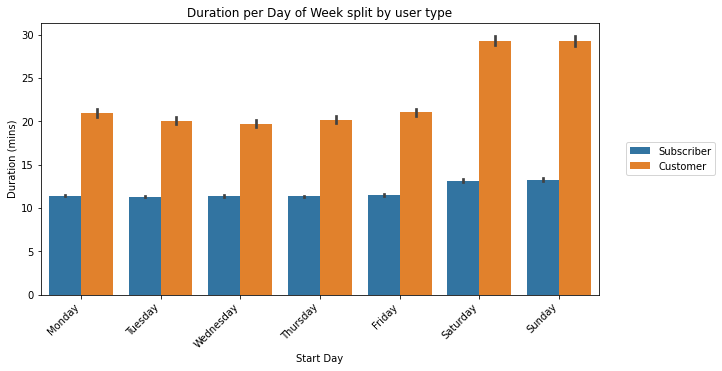

In [33]:
#Clustered Bar chart showing duration in minutes for each user type for time period: Per Weekday over a Week
plt.figure(figsize=(10,5))
sb.barplot(data = bike_san_fran, x = 'start_day_name', y = 'duration_min', hue = 'user_type',order=order)
#polish
plt.xlabel('Start Day')
plt.ylabel('Duration (mins)')
plt.title('Duration per Day of Week split by user type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

The above clustered bar chart, shows us that there is an **increase for both types of users in the distance of a bike journey taken on weekends**. We see for subscribers there is a slight increase of a few minutes journey duration but on both Saturday and Sunday, Customer users cycle on average for 10 more minutes than during the weekdays.

This information could be used by the company to implement additional pricing options for weekend days, to make sure they can make the most amount of money from the increased time spent cycling on weekend by Customer users.

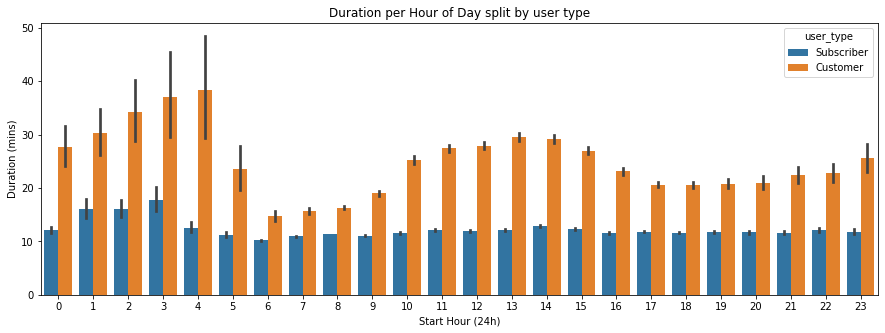

In [34]:
#Clustered Bar chart showing duration in minutes for each user type for time period: Per Hour over a Day
plt.figure(figsize=(15,5))
sb.barplot(data = bike_san_fran, x = 'start_hour', y = 'duration_min', hue = 'user_type')
#polish
plt.xlabel('Start Hour (24h)')
plt.ylabel('Duration (mins)')
plt.title('Duration per Hour of Day split by user type')
plt.show()


We can see from the above graph that throughout the day, **journey duration by Subscriber type users, stays pretty much level arounnd 10 minutes**. However **during the day for Customer type users, we see a rise in journey time from the morning and then a peak time around 1 or 2 in the afternoon, followed by a dip around 6 and then a rise as we get into night-time**

It is suprising to see that for both types of users, there is a **significant peak in journey duration within the early hours of the morning from 1 to 3**. More research is needed to understand why this peak occurs but the company could use this information to make more money from users riding during these times.

## Conclusions: <a name="conc"></a>

We see for all when looking at time periods for year and day of month, the average journey duration for user type Subscriber is pretty consistent staying level around 10 minutes with no major peaks or troughs. 

As we zoom in on the timescale and look at day of week and hourly timescales, we see there is a greater amount of variation. However this variation is amplified when looking at Customer users who have a maximum variation of 25 minutes ride duration. We see suprisingly that the peak ride duration for both types of users is in the early hours of the morning. Showing users tend to on average, ride the bike for longer periods early in the morning. Additional market research could be performed to understand this trend in behaviour and a monetisation strategy developed to maximise income from users riding during these times. 

We also got a good understanding of the most (and least) popular bike stations to depart and arrive from and we were also able to visualise the most popular routes between the popular start and end stations. The company could use this information to ensure there are sufficient bikes during peak times and could also optimize their bike redistribution path to ensure bikes will be redistributed as evenly as needed, whilst minimising fuel and labor costs associated with redistributing the bikes.